In [145]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

In [79]:
np.array([1,2,3])

array([1, 2, 3])

In [80]:
data = pd.read_csv('dataset/Boston Housing.csv', encoding = "ISO-8859-1")

In [81]:
data.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [82]:
def normal(x:list):
    maxi = max(x)
    mini = min(x)
    avg = np.mean(x)
    new = [(i-avg)/(maxi-mini) for i in x ]
    
    return new

In [83]:
df = data.copy()

df = df.apply(normal, axis=0)

df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.040544,0.066364,-0.323562,-0.06917,-0.034352,0.055636,-0.034757,0.026822,-0.371713,-0.214193,-0.335695,0.101432,-0.211729,0.032604
1,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.026129,0.106335,0.106581,-0.328235,-0.317246,-0.069738,0.101432,-0.096939,-0.020729
2,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.172517,-0.076981,0.106581,-0.328235,-0.317246,-0.069738,0.091169,-0.237943,0.270382
3,-0.040251,-0.113636,-0.328328,-0.06917,-0.198961,0.136686,-0.234551,0.206163,-0.284757,-0.355414,0.026007,0.095708,-0.268021,0.241493
4,-0.039839,-0.113636,-0.328328,-0.06917,-0.198961,0.165236,-0.148042,0.206163,-0.284757,-0.355414,0.026007,0.101432,-0.202071,0.303715


In [84]:
Xd = df.drop(columns=['MEDV'])
Xd.insert(0, 'X0', 1)
Xd.head()

,X0,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,-0.040544,0.066364,-0.323562,-0.06917,-0.034352,0.055636,-0.034757,0.026822,-0.371713,-0.214193,-0.335695,0.101432,-0.211729
1,1,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.026129,0.106335,0.106581,-0.328235,-0.317246,-0.069738,0.101432,-0.096939
2,1,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.172517,-0.076981,0.106581,-0.328235,-0.317246,-0.069738,0.091169,-0.237943
3,1,-0.040251,-0.113636,-0.328328,-0.06917,-0.198961,0.136686,-0.234551,0.206163,-0.284757,-0.355414,0.026007,0.095708,-0.268021
4,1,-0.039839,-0.113636,-0.328328,-0.06917,-0.198961,0.165236,-0.148042,0.206163,-0.284757,-0.355414,0.026007,0.101432,-0.202071


In [85]:
Xd.iloc[0,:]

X0         1.000000
CRIM      -0.040544
ZN         0.066364
INDUS     -0.323562
CHAS      -0.069170
NX        -0.034352
RM         0.055636
AGE       -0.034757
DIS        0.026822
RAD       -0.371713
TAX       -0.214193
PTRATIO   -0.335695
B          0.101432
LSTAT     -0.211729
Name: 0, dtype: float64

In [86]:
# numpy array format
y = df.MEDV.values
X = Xd.values

In [87]:
# sample size
m = len(df.index)
m

506

In [88]:
# number of features
n = X.shape[1]
n

14

In [89]:
# Initialize theta
theta = np.ones(n)

theta

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# No Vectorization

### Hypothesis

In [90]:
# all the elements in the first row
X[0,:]

array([ 1.        , -0.0405441 ,  0.06636364, -0.32356227, -0.06916996,
       -0.03435197,  0.05563625, -0.03475696,  0.02682186, -0.37171335,
       -0.21419304, -0.33569506,  0.10143217, -0.21172912])

In [91]:
# hypothesis for the first sample
hypo = 0
for j in range(n):
    hypo += theta[j]*X[0,j]

hypo

-0.3854619236396593

In [92]:
%%time
# hypothesis for all the samples
all_hypo = []
for i in range(m):
    hypo_i = 0
    for j in range(n):
        hypo_i += theta[j]*X[i,j]
    all_hypo.append(hypo_i)       

Wall time: 4 ms


In [93]:
all_hypo

[-0.3854619236396593,
 -0.020199015971414436,
 -0.20839437418549767,
 -0.4285241987963731,
 -0.24138047295937531,
 -0.3431809297992675,
 0.16992431241733566,
 0.7291974106276335,
 0.9499840269978372,
 0.5683291899121906,
 0.8116982482768587,
 0.42458318714377297,
 -0.07014343440672327,
 0.4047633135547745,
 0.6570915533222461,
 0.3116897419811221,
 -0.018553662065734472,
 0.729696753646631,
 -0.20757776894470306,
 0.42809411381766477,
 0.9310965152295133,
 0.7719712662650017,
 0.9786423037925016,
 1.0351548715696275,
 0.9213493682217324,
 0.5551440263793039,
 0.8006293421388554,
 0.7028071672881852,
 0.9264217512283982,
 0.8284953174750775,
 0.9577523262708191,
 0.862504144990133,
 0.6786721200575874,
 0.8036142426152384,
 0.6779379934598004,
 0.01632274697069447,
 -0.07039129990623946,
 -0.2472983778379242,
 -0.31950444747475354,
 -0.04128298547670434,
 -0.0854030604688038,
 -0.8261143209659993,
 -0.881385380418785,
 -0.8012249678206881,
 -0.43840160565384,
 -0.5951338892892255,
 -0.4

In [94]:
len(all_hypo)

506

### cost function

In [95]:
%%time
# cost function
cost = 0
for i in range(m):
    hypo_i = 0
    for j in range(n):
        hypo_i += theta[j]*X[i,j]
    cost_i = (hypo_i - y[i])**2
    cost += cost_i
cost = (1/(2*m))*cost
    

Wall time: 4 ms


In [96]:
cost

1.399752908228425

In [97]:
def cost_loop(theat = theta, x=X, y=y, m=m, n=n):
    cost = 0
    for i in range(m):
        hypo_i = 0
        for j in range(n):
            hypo_i += theta[j]*X[i,j]
        cost_i = (hypo_i - y[i])**2
        cost += cost_i
    cost = (1/(2*m))*cost
    
    return cost

In [98]:
cost_loop()

1.399752908228425

### Derivation

In [99]:
%%time
# derivation
dev_list = []
for k in range(n):
    dev_sum = 0
    for i in range(m):
        hypo_i = 0
        for j in range(n):
            hypo_i += theta[j]*X[i,j]
        dev_i = (hypo_i - y[i])*X[i,k]
        dev_sum += dev_i
    dev_sum = (1/m)*dev_sum
    
    dev_list.append(dev_sum)


Wall time: 47 ms


In [100]:
dev_list

[0.9999999999999983,
 0.07814620360307895,
 -0.11042922261438312,
 0.2620302340552936,
 0.05504439083525137,
 0.23892542562534522,
 -0.06454255823702795,
 0.2611634394125097,
 -0.1453677181065729,
 0.43106386997897883,
 0.38303455280215737,
 0.16591512402899725,
 -0.09920797306076046,
 0.1835280968258358]

In [102]:
%%time
a = 0.0005
theta = np.ones(n)

cost_list = []


for itr in range(100000):
    
    dev_list = []
    for k in range(n):
        dev_sum = 0
        for i in range(m):
            hypo_i = 0
            for j in range(n):
                hypo_i += theta[j]*X[i,j]
            dev_i = (hypo_i - y[i])*X[i,k]
            dev_sum += dev_i
        dev_sum = (1/m)*dev_sum

        dev_list.append(dev_sum)
    
    theta = theta - a*np.array(dev_list)
    
    cost_val = cost_loop(theta)
    
    cost_list.append(cost_val)

Wall time: 1h 15min 58s


In [103]:
cost_val

0.017663350184258856

Text(0.5,1,'For Loop: MSE Trend over Iterations')

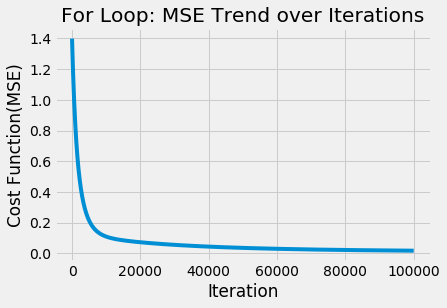

In [105]:
plt.plot(np.arange(0, 100000),cost_list)
plt.xlabel('Iteration'); plt.ylabel('Cost Function(MSE)'); plt.title('For Loop: MSE Trend over Iterations')

# Vectorization

In [108]:
# Initialize theta
theta = np.ones(n)

theta

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Hypothesis

In [109]:
%%time
# matrix format
hypo = X@theta

Wall time: 0 ns


In [110]:
hypo

array([-3.85461924e-01, -2.01990160e-02, -2.08394374e-01, -4.28524199e-01,
       -2.41380473e-01, -3.43180930e-01,  1.69924312e-01,  7.29197411e-01,
        9.49984027e-01,  5.68329190e-01,  8.11698248e-01,  4.24583187e-01,
       -7.01434344e-02,  4.04763314e-01,  6.57091553e-01,  3.11689742e-01,
       -1.85536621e-02,  7.29696754e-01, -2.07577769e-01,  4.28094114e-01,
        9.31096515e-01,  7.71971266e-01,  9.78642304e-01,  1.03515487e+00,
        9.21349368e-01,  5.55144026e-01,  8.00629342e-01,  7.02807167e-01,
        9.26421751e-01,  8.28495317e-01,  9.57752326e-01,  8.62504145e-01,
        6.78672120e-01,  8.03614243e-01,  6.77937993e-01,  1.63227470e-02,
       -7.03912999e-02, -2.47298378e-01, -3.19504447e-01, -4.12829855e-02,
       -8.54030605e-02, -8.26114321e-01, -8.81385380e-01, -8.01224968e-01,
       -4.38401606e-01, -5.95133889e-01, -4.71445982e-01,  2.84738321e-01,
        6.23351574e-01, -6.44299861e-02, -8.72848508e-02,  4.56007370e-03,
       -4.58088422e-01, -

### Cost function

In [112]:
%%time
# cost function
cost = (1/(2*m))*np.transpose((X@theta - y))@(X@theta - y)

Wall time: 0 ns


In [113]:
cost

1.3997529082284244

In [114]:
a = np.array([1,2,3])
b = np.array([1,1,1])
a@b

6

In [115]:
a@np.transpose(b)

6

In [116]:
def cost(theta, X=X, y=y, m=m):
    cost = np.transpose((X@theta - y))@(X@theta - y)
    cost = (1/(2*m))*cost
    return cost

In [117]:
cost(theta)

1.3997529082284244

# Derivation

In [120]:
%%time
dev = (1/m)*np.transpose(X)@(X@theta - y)

Wall time: 0 ns


In [121]:
dev

array([ 1.        ,  0.0781462 , -0.11042922,  0.26203023,  0.05504439,
        0.23892543, -0.06454256,  0.26116344, -0.14536772,  0.43106387,
        0.38303455,  0.16591512, -0.09920797,  0.1835281 ])

In [122]:
def cost_dev(thetar=theta, X=X, y=y, m=m):
    dev = np.transpose(X)@(X@thetar - y)
    dev = (1/m)*dev
    return np.array(dev)

In [123]:
cost_dev()

array([ 1.        ,  0.0781462 , -0.11042922,  0.26203023,  0.05504439,
        0.23892543, -0.06454256,  0.26116344, -0.14536772,  0.43106387,
        0.38303455,  0.16591512, -0.09920797,  0.1835281 ])

In [124]:
(X@theta-y).shape

(506,)

In [125]:
X.shape

(506, 14)

In [126]:
# assign a learnin rate
a = 0.0005

In [127]:
theta = np.ones(n)
theta

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [132]:
%%time
a = 0.0005
theta = np.ones(n)

cost_list = []

for i in range(100000):
    
    theta = theta - a*(1/m)*np.transpose(X)@(X@theta - y)
           
    cost_val = cost(theta)
    cost_list.append(cost_val)

Wall time: 1.75 s


Text(0.5,1,'Vectorization: MSE Trend over Iterations')

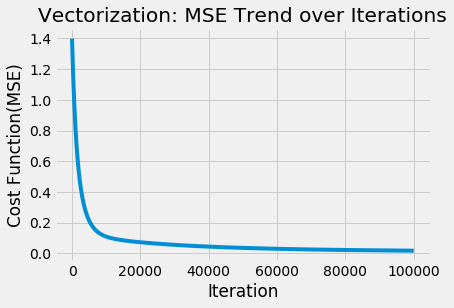

In [135]:
plt.plot(np.arange(0, 100000),cost_list)
plt.xlabel('Iteration'); plt.ylabel('Cost Function(MSE)'); plt.title('Vectorization: MSE Trend over Iterations')

In [134]:
cost_val

0.017663350184258835

* Time comparison

Text(0.5,1,'Comparison of running time')

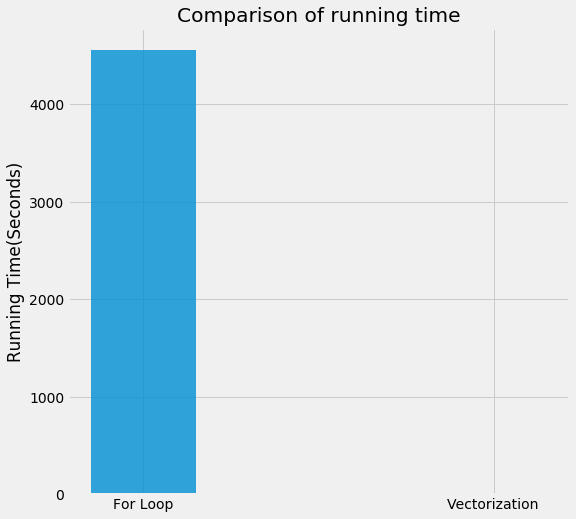

In [149]:
figsize(8,8)

methods = ('For Loop', 'Vectorization')
x = [0,1]
time = [4558, 1.75]
plt.bar(x, time, width=0.3, align='center', alpha = 0.8)
plt.xticks(x, methods)
plt.ylabel('Running Time(Seconds)')
plt.title('Comparison of running time')

# Compare with sk-learn

In [41]:
coef = pd.DataFrame(theta_list)

In [44]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
lr.coef_

array([ 0.        , -0.21355017,  0.10315657,  0.0124631 ,  0.0597052 ,
       -0.1918794 ,  0.4418597 ,  0.00149367, -0.36059247,  0.15642529,
       -0.14362949, -0.19901831,  0.08206283, -0.42260541])

In [46]:
lr.intercept_

-3.1278581821121023e-16

In [47]:
theta

array([-2.70314260e-16, -1.07123973e-01,  8.20555240e-02,  1.78799320e-02,
        6.15094904e-02, -1.64545646e-01,  4.89301460e-01, -2.72985299e-03,
       -3.06608841e-01,  1.30539136e-01, -1.33236313e-01, -1.94457026e-01,
        9.02773726e-02, -4.11697956e-01])

In [48]:
print('Coefficient from SKlearn.LinearRegresson: {}'. format(lr.coef_))

Coefficient from SKlearn.LinearRegresson: [ 0.         -0.21355017  0.10315657  0.0124631   0.0597052  -0.1918794
  0.4418597   0.00149367 -0.36059247  0.15642529 -0.14362949 -0.19901831
  0.08206283 -0.42260541]


In [49]:
lr.coef_[1]

-0.21355016767504129

In [50]:
test= pd.DataFrame(theta)

In [51]:
test

,0
0,-2.703143e-16
1,-1.071240e-01
2,8.205552e-02
3,1.787993e-02
4,6.150949e-02
5,-1.645456e-01
6,4.893015e-01
7,-2.729853e-03
8,-3.066088e-01
9,1.305391e-01


In [52]:
test['LinearRegression()']= lr.coef_

In [53]:
test['LinearRegression()'][0] = lr.intercept_

In [54]:
test=test.rename(columns = {0: 'Gradient Descent'})

In [56]:
#test.index = pd.Index(['Intercept', 'theta1', 'theta2'])

In [57]:
test

,Gradient Descent,LinearRegression()
0,-2.703143e-16,-3.127858e-16
1,-1.071240e-01,-2.135502e-01
2,8.205552e-02,1.031566e-01
3,1.787993e-02,1.246310e-02
4,6.150949e-02,5.970520e-02
5,-1.645456e-01,-1.918794e-01
6,4.893015e-01,4.418597e-01
7,-2.729853e-03,1.493667e-03
8,-3.066088e-01,-3.605925e-01
9,1.305391e-01,1.564253e-01
